# Linear Discriminant Analysis for Binary Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
%matplotlib inline

### First of all lets prepare a dataset

In [2]:
X1 = Series(np.array([4,2,2,3,4,9,6,9,8,10]))
X2 = Series(np.array([1,4,3,6,4,10,8,5,7,8]))

In [3]:
data = DataFrame()

In [4]:
data['X1']=X1
data['X2']=X2
data['class']=np.array(['class1','class1','class1','class1','class1','class2','class2','class2','class2','class2'])
data

,X1,X2,class
0,4,1,class1
1,2,4,class1
2,2,3,class1
3,3,6,class1
4,4,4,class1
5,9,10,class2
6,6,8,class2
7,9,5,class2
8,8,7,class2
9,10,8,class2


### Lets plot the above data and see how it looks

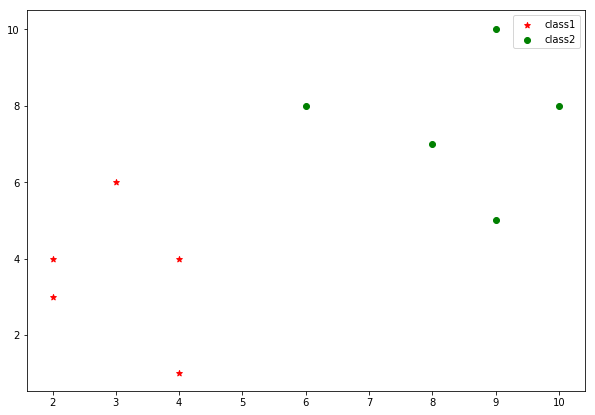

In [5]:
plt.figure(figsize=(10,7))
plt.scatter(data.ix[data['class']=='class1',0],data.ix[data['class']=='class1',1],color='r',marker='*',label='class1')
plt.scatter(data.ix[data['class']=='class2',0],data.ix[data['class']=='class2',1],color='g',marker='o',label='class2')
plt.legend(loc='best')

### Using Step 1 to calculate the mean matrix

In [6]:
mu1 = np.array([np.mean(data.ix[data['class']=='class1',0]),np.mean(data.ix[data['class']=='class1',1])])
mu2 = np.array([np.mean(data.ix[data['class']=='class2',0]),np.mean(data.ix[data['class']=='class2',1])])

In [7]:
print(mu1,mu2)

[ 3.   3.6] [ 8.4  7.6]


### Using Step 2 to find the scatter mattrices of each class and also the within class scatter matrix

In [8]:
s1 = np.dot((np.array(data.ix[data['class']=='class1',:-1])-mu1).T,np.array(data.ix[data['class']=='class1',:-1])-mu1)

In [9]:
s2 = np.dot((np.array(data.ix[data['class']=='class2',:-1])-mu2).T,np.array(data.ix[data['class']=='class2',:-1])-mu2)

In [10]:
s1

array([[  4. ,  -2. ],
       [ -2. ,  13.2]])

In [11]:
s2

array([[  9.2,  -0.2],
       [ -0.2,  13.2]])

In [12]:
sw = s1 + s2
sw

array([[ 13.2,  -2.2],
       [ -2.2,  26.4]])

### Calculating Sb

In [13]:
sb=np.dot((mu1 - mu2).reshape(2,1),(mu1-mu2).reshape(1,2))

In [14]:
sb

array([[ 29.16,  21.6 ],
       [ 21.6 ,  16.  ]])

In [15]:
A = np.dot(np.linalg.inv(sw),sb)
A

array([[ 2.37848912,  1.76184379],
       [ 1.01638924,  0.75288092]])

In [16]:
w,v = np.linalg.eig(A)

In [17]:
np.linalg.eigvals(A)

array([ 3.13137004,  0.        ])

In [18]:
v.T[0]

array([ 0.91955932,  0.39295122])

### Using Step 3 to find the projection vector W

In [19]:
W = np.dot(np.linalg.inv(sw),(mu1-mu2).reshape(2,1))
W

array([[-0.44046095],
       [-0.18822023]])

In [20]:
-W.T[0] #converting it to positive as it is not going to create much of a difference

array([ 0.44046095,  0.18822023])

In [21]:
0.44/np.sqrt(0.44**2+0.188**2)

0.91957687918527331

In [22]:
0.188/np.sqrt(0.44**2+0.188**2)

0.39291012110643497

### Using Step 4 to find the scalar quantities for each set of input features 

In [23]:
f=[]
for i in range(len(data.ix[:,:-1])):
    f.append(np.dot(-W.T[0],np.array(data.ix[i,:-1],dtype='float64').reshape(2,1)))

In [24]:
data['projection']=np.array(f)

### The final data along with the projected scalar quantities looks like this

In [25]:
data

,X1,X2,class,projection
0,4,1,class1,1.950064
1,2,4,class1,1.633803
2,2,3,class1,1.445583
3,3,6,class1,2.450704
4,4,4,class1,2.514725
5,9,10,class2,5.846351
6,6,8,class2,4.148528
7,9,5,class2,4.905250
8,8,7,class2,4.841229
9,10,8,class2,5.910371


### Lets plot and see how well they are seperated

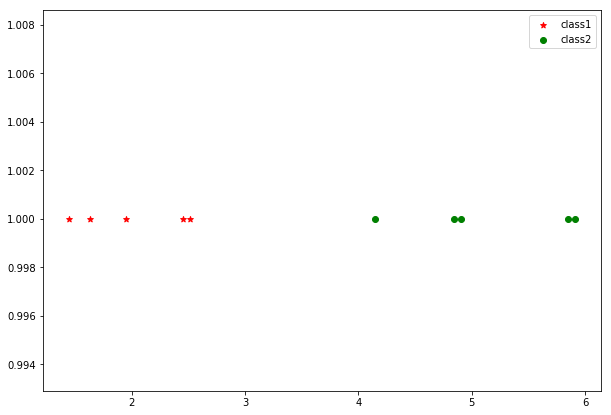

In [26]:
plt.figure(figsize=(10,7))
plt.scatter(data.ix[data['class']=='class1',3],np.array([1,1,1,1,1]),color='r',marker = '*',label='class1')
plt.scatter(data.ix[data['class']=='class2',3],np.array([1,1,1,1,1]),color='g',marker = 'o',label='class2')
plt.legend(loc='best')